In [1]:
import matplotlib
from matplotlib import transforms, pyplot as plt
import numpy as np

%matplotlib inline

import logging
logging.getLogger('matplotlib.font_manager').disabled = True

In [2]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [3]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [4]:
# # directors by year
X = ['Today\n9/30/15', 'FY16', 'FY17', 'FY18', 'FY19', 'FY20']
YA = np.array([0, -28, -44, -62, -77, -99]) # attrition
YT = np.array([190, 162, 146, 128, 113, 91]) # today
YP = np.array([0, 7, 10, 14, 16, 22]) # promoted
YQ = np.array([0, 4, 4, 4, 4, 4]) # acquisition
YU = np.array([0, 28, 50, 68, 91, 112]) # unmet gap

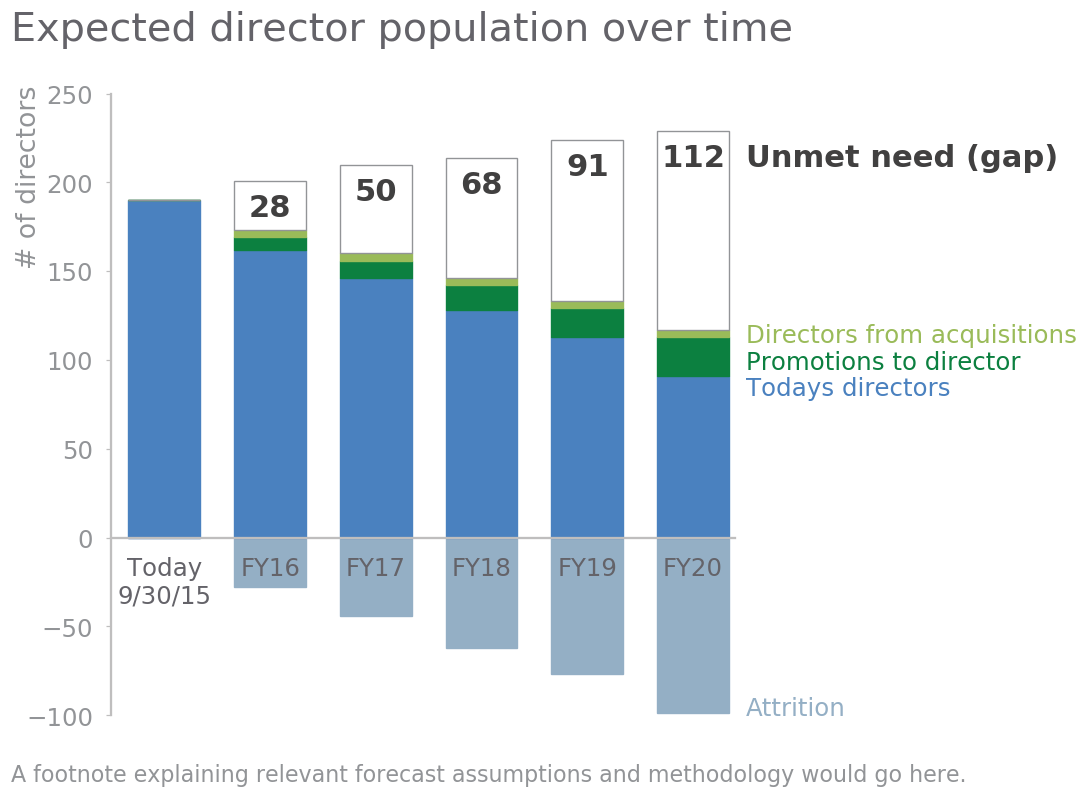

In [5]:
# create new figure
fig, ax1 = plt.subplots(figsize=(9.5, 7.2),  # width, height in inches
                        dpi=110)  # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.103, right=0.7, top=0.881, bottom=0.096)

# set the data limits for the y,x-axis
ax1.set_ylim([-100, 250])
ax1.set_xlim([-0.5, 5.4])
# move x axes to zero
ax1.spines['bottom'].set_position('zero')

plt.bar(list(range(0, 6)), YA, width=0.68, color=BLUE4, 
        edgecolor=BLUE4, linewidth=0.9)
plt.bar(list(range(0, 6)), YT, width=0.68, color=BLUE2, 
        edgecolor=BLUE2, linewidth=0.9)
plt.bar(list(range(0, 6)), YP, width=0.68, bottom=YT, color=GREEN1, 
        edgecolor=GREEN1, linewidth=0.9)
plt.bar(list(range(0, 6)), YQ, width=0.68, bottom=YT + YP, color=GREEN2, 
        edgecolor=GREEN2, linewidth=0.9)
white_bars = plt.bar(list(range(0, 6)), YU, width=0.68, bottom=YT + YP + YQ, 
                     color='white', edgecolor=GRAY7, linewidth=0.9)

# add numerical data labels for bars
for i, b in enumerate(white_bars):
    if YU[i] == 0:
        continue
    x = b.get_x() + b.get_width() / 2  # x-center of bar
    y = b.get_y() + b.get_height() - 20  # y-top of bar
    ax1.text(x, y,
             str(YU[i]),
             fontsize=20,
             fontweight='bold',
             horizontalalignment='center',
             color=GRAY2)

# add text for numerical data labels
ax1.text(5.5, y, 'Unmet need (gap)', fontsize=20, fontweight='bold', 
         color=GRAY2)

# add text labeling other bars
ax1.text(5.5, 110, 'Directors from acquisitions', fontsize=16, color=GREEN2)
ax1.text(5.5, 95, 'Promotions to director', fontsize=16, color=GREEN1)
ax1.text(5.5, 80, 'Today''s directors', fontsize=16, color=BLUE2)
ax1.text(5.5, -100, 'Attrition', fontsize=16, color=BLUE4)

# set properties for axes object (ticks for all issues with labels)
plt.setp(ax1, xticks=list(range(0, 6)), xticklabels=X)

# remove chart border
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_color(GRAY9)
ax1.spines['left'].set_color(GRAY9)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)

# change y ticks color
ax1.tick_params(axis='y', colors=GRAY9)
# hide x ticks
ax1.tick_params(bottom=False)

# configure x tick label appearance
for item in ax1.get_xticklabels():
    item.set_fontsize(16)
    item.set_color(GRAY4)
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# configure y tick label appearance
for item in ax1.get_yticklabels():
    item.set_fontsize(16)
    item.set_color(GRAY7)
    # use trasformations to shift y tick labels slightly left
    offset = transforms.ScaledTranslation(-0.07, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# title the axis
ax1.text(-1.4, 155, '# of directors', fontsize=17.5, rotation='vertical', 
         color=GRAY7)

# add footnote with the data source
plt.text(-1.45, -137,
         'A footnote explaining relevant forecast assumptions'
         ' and methodology would go here.',
         fontsize=14.5, color=GRAY7)

# title the plot
plt.text(-1.45, 280, 'Expected director population over time', 
         fontsize=26, color=GRAY4);